# 代表値と尤度
統計データは要約をすることでおおよその分布が分かったり、また正規分布に従っていれば尖り具合(尖度)やデータの偏り(歪度)が分かる。またデータが正規分布に従っているのであればそのデータがどれだけ尤な値(尤度)を取っているかを調べる必要がある。ここで尤もな値とは得られた数値がどれくらいの割合で同時に発生するかを数値化したものになる。

# ライブラリのインポート

In [1]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# データの読み込み

In [2]:
df = pd.read_csv("wine.csv")
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


# 尖度
尖度は分布の尖り具合を表している

In [3]:
df.skew()

Wine                    0.107431
Alcohol                -0.051482
Malic.acid              1.039651
Ash                    -0.176699
Acl                     0.213047
Mg                      1.098191
Phenols                 0.086639
Flavanoids              0.025344
Nonflavanoid.phenols    0.450151
Proanth                 0.517137
Color.int               0.868585
Hue                     0.021091
OD                     -0.307285
Proline                 0.767822
dtype: float64

# 歪度
歪度は分布の偏りを表している

In [4]:
df.kurt()

Wine                   -1.322787
Alcohol                -0.852500
Malic.acid              0.299207
Ash                     1.143978
Acl                     0.487942
Mg                      2.104991
Phenols                -0.835627
Flavanoids             -0.880382
Nonflavanoid.phenols   -0.637191
Proanth                 0.554649
Color.int               0.381522
Hue                    -0.344096
OD                     -1.086435
Proline                -0.248403
dtype: float64

# 要約統計量

In [5]:
con = []
for col in df.columns:
    con.append(df[col].describe())
pd.concat(con, axis=1)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# 尤度の計算
尤度の計算として、機械学習で予測した結果得られた正解率の分布を用いる。正解率の箱ひげ図と正規分布を確認する。また、尤度の計算では正規分布に対して対象のデータを用いて積を計算して同時発生する確率を算出する。

In [6]:
df = pd.read_csv("wine.csv")
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [7]:
y_name = "Wine"
y = df["Wine"].values
x_table = df.drop(y_name, axis=1)
x = x_table.values

In [8]:
score = []
for i in range(50):
    x_train, x_test, y_train, y_test = tts(x, y, random_state=i, test_size=0.3)
    model = GBC()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score.append(accuracy_score(y_test, y_pred))

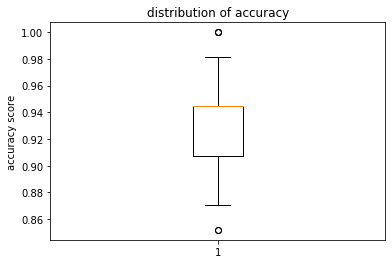

In [9]:
plt.boxplot(score)
plt.title("distribution of accuracy")
plt.ylabel("accuracy score")
plt.show()

## 尤度の計算

In [10]:
score = np.array(score)
L = (1 / ((2 * np.pi) ** 0.5) * np.std(score)) * np.exp( - (( score - np.mean(score)) ** 2) / 2)
np.prod(L)

1.1134222891027906e-93

## 対数での表現
尤度は確率の同時発生であるため限りなく0に近い値を取ることが多い。そこで、対数を用いてより分かりやすい数値に変える。

In [11]:
np.log(np.prod(L))

-214.03297523292588

## 正規分布での精度の分布

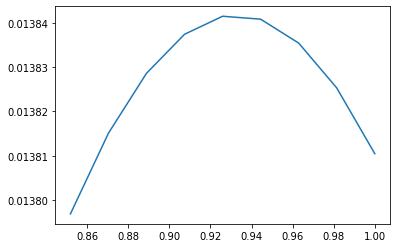

In [12]:
La = np.array([score,L]).T
La = np.array(sorted(La, key=lambda x: x[0]))
plt.plot(La[:,0], La[:,1])
plt.show()

## 箱ひげ図と正規分布を合わせて表示
箱ひげ図では四分位と最大値・最小値・外れ値・中央値が表示されるが、正規分布で表示することで具体的にどの数値が発生しやすいかが確認できる。

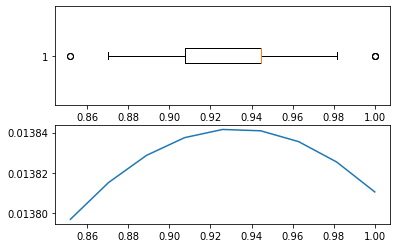

In [13]:
plt.subplot(2, 1, 1)
plt.boxplot(score, vert=False)
plt.subplot(2, 1, 2)
plt.plot(La[:,0], La[:,1])
plt.show()

# 確率密度関数で説明変数を可視化
説明変数が分類に影響する程度や値の条件を把握するには決定木を用いた分類寄与率や重回帰分析の数値とp値がある。しかし、これらの手法では全体での把握はできても各目的変数別の条件が分からない。そこで説明変数を目的変数の値別に各項目で取り出して正規分布で表す。こうすることでデータの分布が可視化され特徴量の説明変数別の分布が分かりやすくなる。

## 目的変数別にデータフレーム化

In [14]:
df_1 = df.query("Wine==1")
df_2 = df.query("Wine==2")
df_3 = df.query("Wine==3")
df_2.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
58,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
59,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450
60,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
61,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420
62,2,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355


## 正規分布にして可視化
手順としては各特徴量を目的変数別に抽出して値をソートし、正規分布の式に当てはめてから目的変数別に折れ線グラフにする。ここで、高い数値を取るデータはその目的変数のその項目で最も取りやすい値になる。

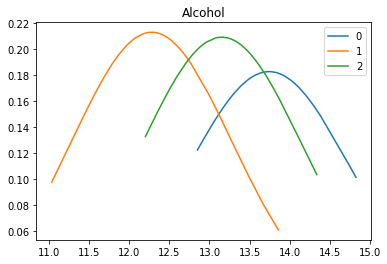

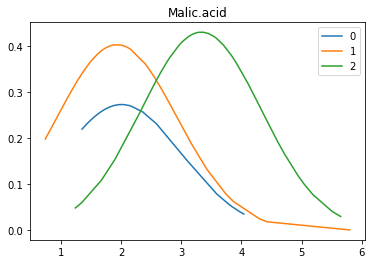

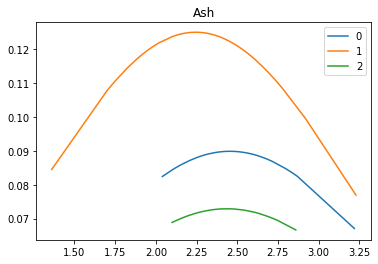

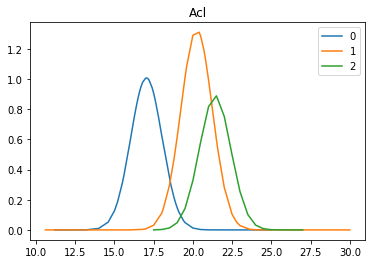

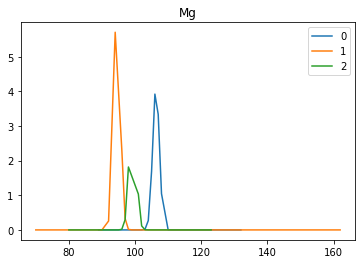

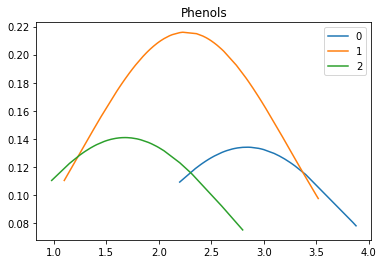

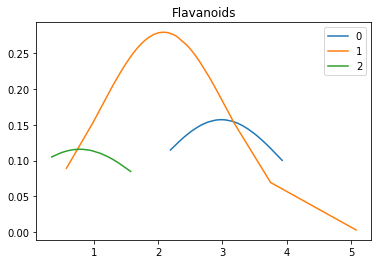

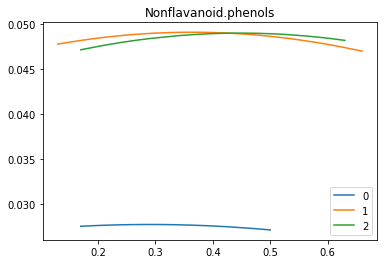

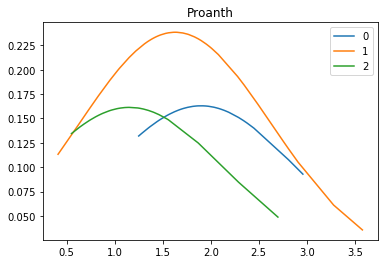

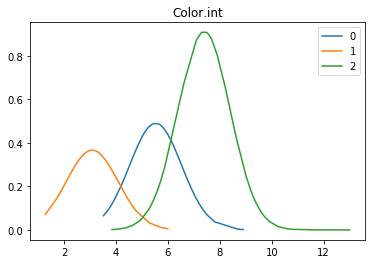

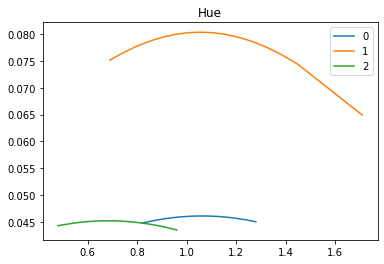

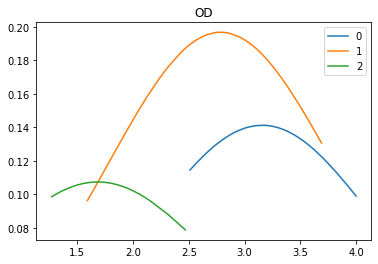

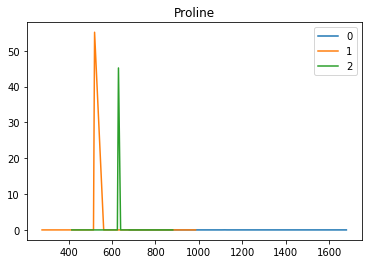

In [15]:
df_1 = df_1.drop("Wine", axis=1)
df_2 = df_2.drop("Wine", axis=1)
df_3 = df_3.drop("Wine", axis=1)
for col in df_1.columns:
    x1 = df_1[col].values
    x2 = df_2[col].values
    x3 = df_3[col].values
    x1.sort()
    x2.sort()
    x3.sort()
    y1 = (1 / ((2 * np.pi) ** 0.5) * np.std(x1)) * np.exp( - (( x1 - np.mean(x1)) ** 2) / 2)
    y2 = (1 / ((2 * np.pi) ** 0.5) * np.std(x2)) * np.exp( - (( x2 - np.mean(x2)) ** 2) / 2)
    y3 = (1 / ((2 * np.pi) ** 0.5) * np.std(x3)) * np.exp( - (( x3 - np.mean(x3)) ** 2) / 2)
    plt.title(col)
    plt.plot(x1, y1, label="0")
    plt.plot(x2, y2, label="1")
    plt.plot(x3, y3, label="2")
    plt.legend()
    plt.show()

In [16]:
imp = model.feature_importances_
dfi = pd.DataFrame(imp)
dfi.index = x_table.columns
dfi.columns = ["分類寄与率"]
dfi = dfi.sort_values("分類寄与率", ascending=False)
dfi

,分類寄与率
Color.int,0.264426
Proline,0.262707
OD,0.152792
Hue,0.132875
Flavanoids,0.053572
Alcohol,0.041602
Malic.acid,0.035158
Mg,0.023438
Proanth,0.019344
Ash,0.008954
